In [237]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
url = "heart+disease/processed.cleveland.data"

data = pd.read_csv(url,sep=',', header=None)

data = data.replace('?',np.nan).dropna()

data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','disease']

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [239]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297,297,297.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174,164,NaN
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,NaN,NaN,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,NaN,NaN,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [240]:
# convert the columns 'ca' and 'thal' types to numeric
data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


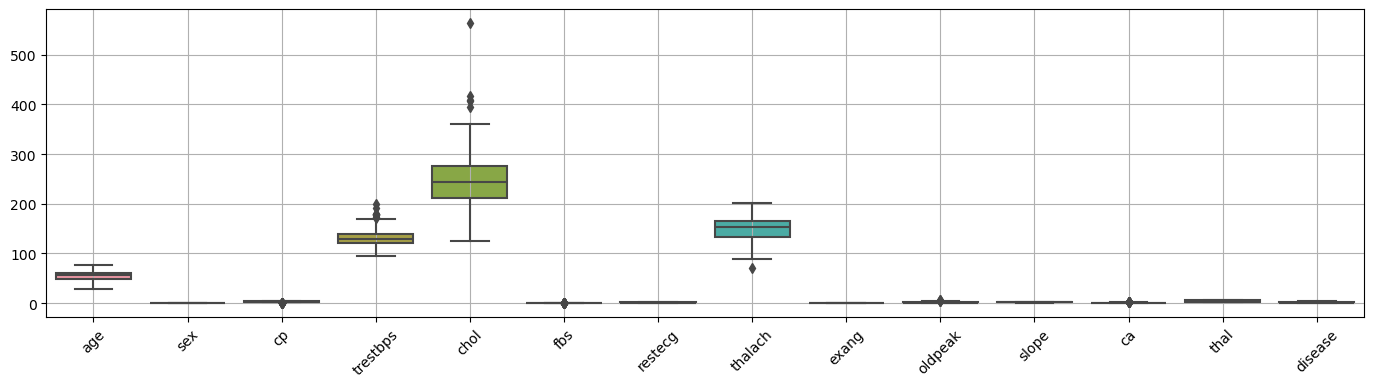

In [241]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid()
plt.show()

In [242]:
# remove rows with outliers
data = data[data['chol']<450]

### z-score all variables except for num

# find the columns we want to normalize 
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['sex', 'fbs', 'exang', 'disease'])
#cols2zscore = cols2zscore.drop(['disease'])

data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()


C:\Users\keving\AppData\Local\Temp\ipykernel_14512\2697141315.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols2zscore] = data[cols2zscore].apply(stats.zscore)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
count,2.960000e+02,296.000000,2.960000e+02,2.960000e+02,2.960000e+02,296.00000,2.960000e+02,2.960000e+02,296.000000,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,296.000000
mean,6.001206e-18,0.679054,9.001808e-18,2.100422e-17,-2.655533e-16,0.14527,-6.001206e-17,-1.560313e-16,0.327703,4.800964e-17,4.800964e-17,-1.200241e-17,6.001206e-17,0.949324
std,1.001693e+00,0.467631,1.001693e+00,1.001693e+00,1.001693e+00,0.35297,1.001693e+00,1.001693e+00,0.470171,1.001693e+00,1.001693e+00,1.001693e+00,1.001693e+00,1.235410
min,-2.826856e+00,0.000000,-2.237510e+00,-2.128416e+00,-2.473909e+00,0.00000,-1.000046e+00,-3.425729e+00,0.000000,-9.039406e-01,-9.734482e-01,-7.238322e-01,-8.908300e-01,0.000000
25%,-7.205712e-01,0.000000,-1.645743e-01,-6.624871e-01,-7.256419e-01,0.00000,-1.000046e+00,-7.222683e-01,0.000000,-9.039406e-01,-9.734482e-01,-7.238322e-01,-8.908300e-01,0.000000
50%,1.662857e-01,1.000000,-1.645743e-01,-9.866828e-02,-7.775479e-02,0.00000,6.803036e-03,1.280137e-01,0.000000,-2.176529e-01,6.453196e-01,-7.238322e-01,-8.908300e-01,0.000000
75%,7.205712e-01,1.000000,8.718934e-01,4.651505e-01,5.958421e-01,0.00000,1.013652e+00,7.166704e-01,1.000000,5.115278e-01,6.453196e-01,3.421097e-01,1.177293e+00,2.000000
max,2.494285e+00,1.000000,8.718934e-01,3.848063e+00,3.511334e+00,1.00000,1.013652e+00,2.286422e+00,1.000000,4.414789e+00,2.264087e+00,2.473994e+00,1.177293e+00,4.000000


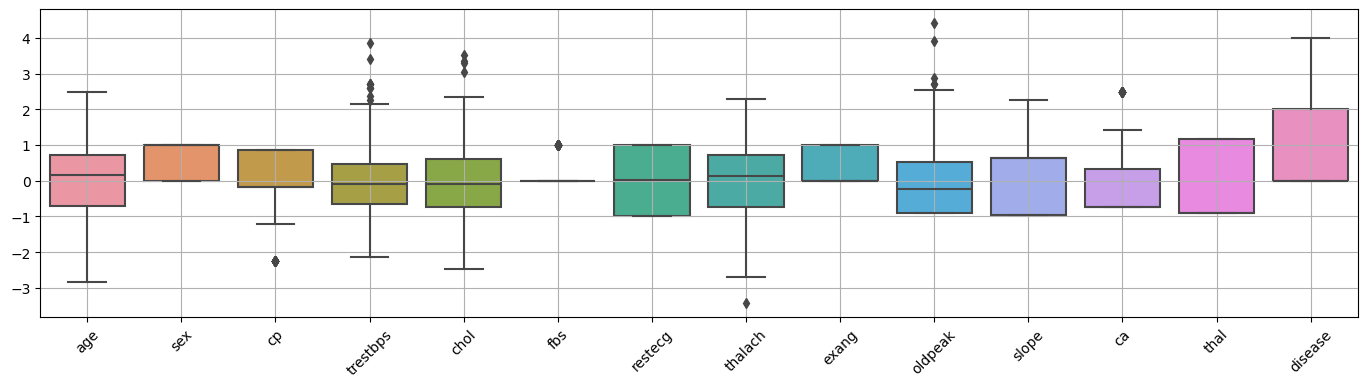

In [243]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid()
plt.show()

In [244]:
dataCols = data.keys()
dataCols = dataCols.drop('disease')

# binarize the data labels
# create a new column for binarized (boolean) quality
data['boolDisease'] = 0
#data['boolDisease'][data['disease']>0] = 1
data.loc[data['disease']>0, 'boolDisease'] = 1

data[['disease', 'boolDisease']]



C:\Users\keving\AppData\Local\Temp\ipykernel_14512\635924087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['boolDisease'] = 0


,disease,boolDisease
0,0,0
1,2,1
2,1,1
3,0,0
4,0,0
...,...,...
297,1,1
298,1,1
299,2,1
300,3,1


In [245]:
dataT = torch.tensor(data[dataCols].values).float()
labelsT = torch.tensor(data['boolDisease'].values).float()

labelsT = labelsT[:,None]

# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=.2)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True, drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [246]:
# create a class for the model

class ANNHeart(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(13,96)
    
    ### hidden layers
    self.fc1 = nn.Linear(96,96)
    #self.fc2 = nn.Linear(64,32)

    ### output layer
    self.output = nn.Linear(96,1)    
  
  # forward pass
  def forward(self,x):
    x = torch.relu( self.input(x) )
    x = torch.relu( self.fc1(x) )
    #x = torch.relu( self.fc2(x) )
    return self.output(x)

In [247]:
# a function that trains the model

# global parameter
numepochs = 200

def trainTheModel():

  # loss function and optimizer
  net = ANNHeart()
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # turn on training mode
    net.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    net.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)
    testAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
  
  # function output
  return trainAcc,testAcc,losses

In [248]:
trainAcc, testAcc, losses = trainTheModel()

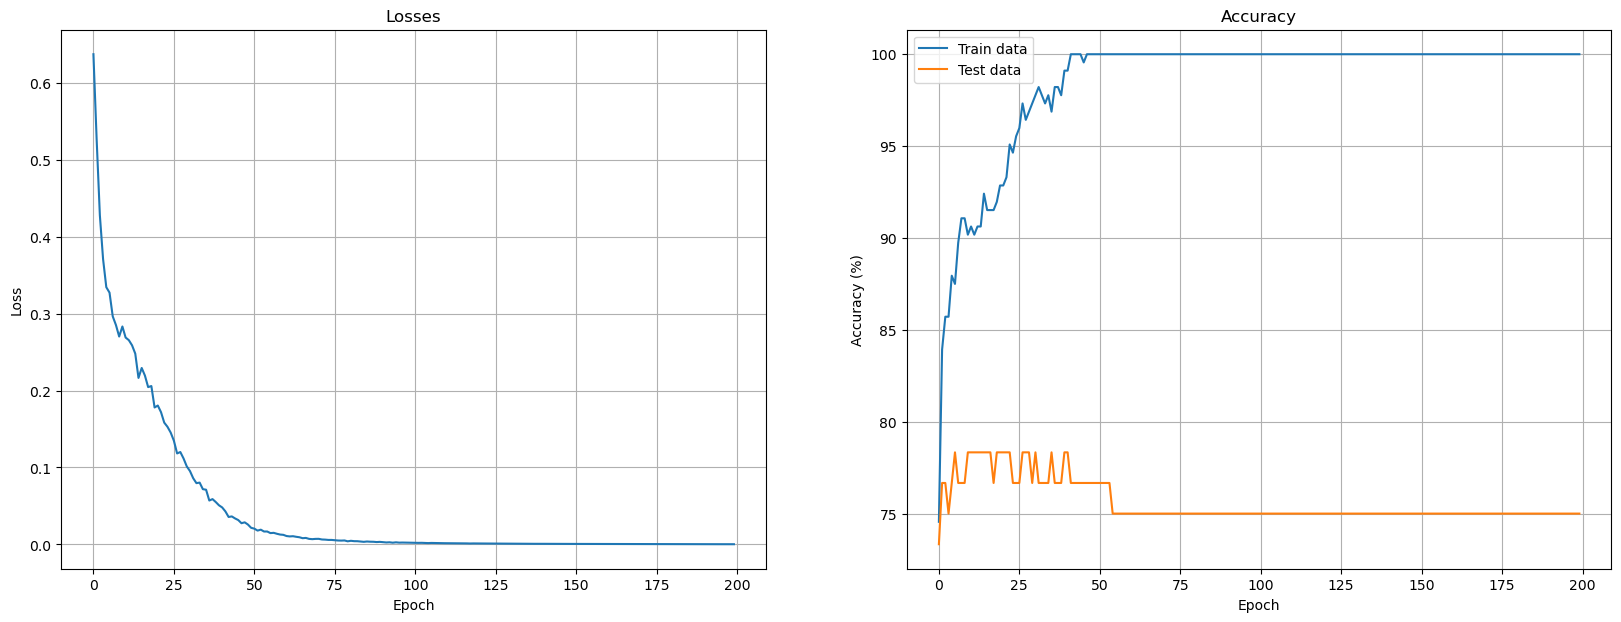

In [249]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(20,7))

ax[0].plot(losses)
ax[0].set_title('Losses')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].grid()


ax[1].plot(trainAcc, label='Train data')
ax[1].plot(testAcc, label='Test data')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend()
ax[1].grid()

plt.show()